# EDA on patterns data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
patterns_df = pd.read_csv('../data/df_patterns_clean2.csv', low_memory = False)

In [3]:
pd.set_option('display.max_columns', 60)
patterns_df.head()

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
0,17,27,2007/01/12,USD,4.903936,2363.0,True,11207,True,8.0,1.0,stockinette stitch,Pomatomus,NaN,5079,4223,4.468085,2256.0,12.0,388.0,NaN,"S, M, L",False,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 23, 'permalink': 'top-cuff-down'}, {'i...",Knitting,True,Socks,Shelridge Yarns Soft Touch Ultra Solid Colors,Fingering
1,29,70,2007/01/12,NaN,2.647959,9283.0,True,23792,True,19.0,4.0,stockinette stitch,Clapotis,NaN,23435,8219,4.431221,8520.0,25.0,820.0,NaN,NaN,False,Aran (8 wpi),"[{'id': 8, 'us': '8 ', 'metric': 5.0, 'us_stee...","{'crochet_gauge': '', 'id': 1, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 165, 'permalink': 'dropped-stitches'},...",Knitting,True,Shawl/Wrap,"'yarn_name': ""Lorna's Laces Lion & Lamb Multi",Aran
2,40,58,2007/02/06,NaN,2.939708,4445.0,True,13003,True,38.0,4.0,zigzag pattern,Jaywalker,NaN,12071,4112,4.266636,4373.0,NaN,465.0,NaN,NaN,True,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 9, '...",Knitting,True,Socks,Zwerger Garn Opal Handpainted / Handgefärbt,Light Fingering
3,54,100,2007/02/07,USD,3.478894,3364.0,True,10444,False,9.0,4.0,"unfelted stockinette; 12 sts=4"" felted.",Felted Clogs (AC33e),7.95,13156,2447,4.527594,3171.0,NaN,500.0,850.0,NaN,True,Worsted (9 wpi),"[{'id': 13, 'us': '13 ', 'metric': 9.0, 'us_st...","{'crochet_gauge': None, 'id': 12, 'knit_gauge'...","[{'id': 363, 'name': 'Slippers', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 10, ...",Knitting,False,Other,'yarn_name': Non,'personal_name': '
4,71,43,2007/02/08,NaN,4.102190,1918.0,True,24533,True,8.0,1.0,pattern,Endpaper Mitts,NaN,5391,7112,4.451213,1855.0,NaN,360.0,NaN,NaN,False,Fingering (14 wpi),[],"{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 395, 'name': 'Fingerless Gloves/Mitts'...","[{'id': 3, 'permalink': 'unisex'}, {'id': 9, '...",Knitting,True,Mittens/Gloves,Louet Gems Pearl,Fingering


In [4]:
patterns_df.describe()

,patt_id,comments_count,difficulty_average,difficulty_count,favorites_count,gauge,gauge_divisor,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max
count,3.019800e+04,30198.000000,30198.000000,30175.000000,30198.000000,21856.000000,23684.000000,11263.000000,30198.000000,30198.000000,30198.000000,30177.000000,16705.000000,22333.000000,16473.000000
mean,3.196084e+05,13.556130,2.874948,125.847688,2891.090238,17.638859,3.469684,7.797369,365.096596,512.448904,4.460624,120.111973,25.619783,537.918999,784.427305
std,2.679647e+05,23.651199,1.005834,290.552903,3881.065860,7.975019,1.114355,27.683805,898.407338,740.215752,0.299171,274.536148,11.262214,579.380357,805.388123
min,1.000000e+01,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000,88.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,9.202375e+04,3.000000,2.122672,42.000000,897.000000,12.000000,4.000000,5.000000,117.000000,154.000000,4.300000,40.000000,18.000000,186.000000,230.000000
50%,2.517445e+05,7.000000,2.715451,61.000000,1786.000000,18.000000,4.000000,6.000000,170.000000,302.000000,4.500000,59.000000,27.000000,375.000000,477.000000
75%,5.104575e+05,16.000000,3.475000,112.000000,3383.000000,22.000000,4.000000,6.800000,313.000000,579.000000,4.666667,107.000000,32.000000,740.000000,1100.000000
max,1.040186e+06,1525.000000,8.586207,9528.000000,67009.000000,99.990000,4.000000,780.000000,32621.000000,14052.000000,5.000000,9054.000000,68.000000,20000.000000,25000.000000


There are definitely outliers in the data. Some are not surprising (favorites_count, projects_count, queued_projects_count, rating_count). These are related to pattern popularity and it was already clear that some patterns are enormously popular. I expect high counts on favorites, queued, and rating to correlate with high project count.

Investigate outliers in these columns: difficulty_average, gauge, price, row_gauge, yardage, yardage_max

In [5]:
patterns_df[patterns_df['difficulty_average'] > 8]


,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
15921,360335,171,2012/11/13,USD,8.586207,29.0,False,5519,False,8.0,1.0,stockinette stitch,Shark Week,NaN,159,854,3.333333,24.0,12.0,394.0,493.0,Women's Medium/Large,False,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 306, 'permalink': 'other-colorwork'}, ...",Knitting,True,Socks,Tsarina of Tsocks Tsilk Tstocking,Fingering
16443,64342,1,2008/05/08,USD,8.295455,44.0,False,196,False,NaN,NaN,NaN,TKGA Master Hand Level 3,NaN,153,48,4.863636,44.0,NaN,NaN,NaN,NaN,False,NaN,[],NaN,"[{'id': 910, 'name': 'Not a pattern', 'permali...","[{'id': 53, 'permalink': 'bobble-or-popcorn'},...",Knitting,False,Other,'yarn_name': Non,'personal_name': '
20376,771583,7,2017/09/03,USD,8.176471,34.0,True,226,False,9.0,1.0,"main color work section of the socks, unstretched",Vertigo 2 Point 0,5.0,128,34,2.333333,27.0,11.0,400.0,550.0,"XSmall, Small, Medium, Large, XLarge",True,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 23, 'permalink': 'top-cuff-down'}, {'i...",Knitting,True,Socks,Rohrspatz & Wollmeise Pure 100% Merino Superwash,Fingering


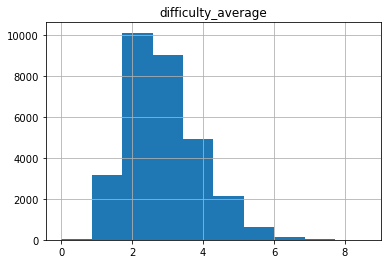

In [6]:
patterns_df.hist(column = 'difficulty_average');
# tends somewhat to the right; not unexpected, this measure is subjective and people tend to think something
# they can do is lower on the difficulty scale

In [7]:
patterns_df[patterns_df['gauge'] > 60]
# some of the outliers are due to differing gauge_patterns. For meaningful analysis, clean up that column
# and limit gauge analysis to stockinette (widely accepted standard and what yarn manufacturers use).
# Really high outliers (99 stitches over 1 or 4 inches) are clearly errors - nobody's getting that with aran yarn.
# Possibility people don't pay attention to called-for gauge in crochet - just use the hook for the size yarn
# and go. Will definitely be easier to limit to standard gauge stitch pattern.

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
18163,552062,9,2015/01/21,USD,2.733333,30.0,True,1805,True,99.99,1.0,NaN,Cthulhu Octopus hat,NaN,142,290,4.375000,32.0,19.0,182.0,200.0,Large,False,Worsted (9 wpi),"[{'id': 9, 'us': '9.0', 'metric': 5.5, 'us_ste...","{'crochet_gauge': None, 'id': 12, 'knit_gauge'...","[{'id': 413, 'name': 'Beanie, Toque', 'permali...","[{'id': 267, 'permalink': 'written-pattern'}, ...",Crochet,True,Hat,Red Heart Super Saver Solids,Aran
24354,635812,5,2016/01/11,NaN,2.609756,41.0,True,1893,True,99.99,4.0,NaN,Halata,NaN,108,222,4.833333,42.0,6.0,656.0,1094.0,NaN,True,Sport (12 wpi),"[{'id': 7, 'us': '7.0', 'metric': 4.5, 'us_ste...","{'crochet_gauge': None, 'id': 10, 'knit_gauge'...","[{'id': 339, 'name': 'Scarf', 'permalink': 'sc...","[{'id': 265, 'permalink': 'chart'}, {'id': 267...",Crochet,True,Scarf,"'yarn_name': ""Lady Dee's Traumgarne Lace",Light Fingering
24954,504429,5,2014/07/15,NaN,2.083333,24.0,True,984,True,99.99,4.0,NaN,Chevron Baby Blanket,NaN,105,107,4.238095,21.0,65.0,NaN,NaN,baby,False,Aran (8 wpi),"[{'id': 9, 'us': '9.0', 'metric': 5.5, 'us_ste...","{'crochet_gauge': '', 'id': 1, 'knit_gauge': '...","[{'id': 886, 'name': 'Baby Blanket', 'permalin...","[{'id': 311, 'permalink': 'stripes-colorwork'}]",Crochet,False,Blanket,Red Heart With Love Solids,Aran


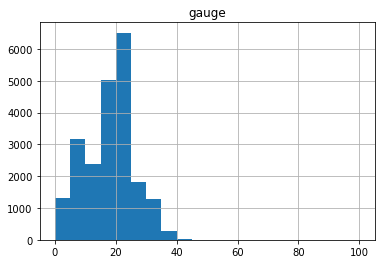

In [8]:
patterns_df.hist(column = 'gauge', bins = 20);

In [9]:
patterns_df[patterns_df['price'] > 50]
# high price outliers due to different currencies - to analyze pattern prices probably most useful to limit to
# USD or convert foreign currencies

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
949,450012,45,2013/11/19,SEK,4.782500,400.0,True,14209,False,20.0,4.0,stockinette,Siri,60.0,1658,2189,4.557592,382.0,28.0,1072.0,1422.0,S-XL,True,DK (11 wpi),"[{'id': 4, 'us': '4 ', 'metric': 3.5, 'us_stee...","{'crochet_gauge': None, 'id': 11, 'knit_gauge'...","[{'id': 304, 'name': 'Cardigan', 'permalink': ...","[{'id': 10, 'permalink': 'adult'}, {'id': 17, ...",Knitting,True,Cardigan,Solkustens Spinnverkstad Gotland 2-trådigt,Worsted
1156,499116,36,2014/06/20,JPY,2.500000,370.0,True,11500,False,25.0,4.0,Stockinette stitch,Banana Leaf Shawl,400.0,1430,2065,4.712366,372.0,34.0,900.0,NaN,One size,True,Lace,"[{'id': 5, 'us': '5 ', 'metric': 3.75, 'us_ste...","{'crochet_gauge': '', 'id': 7, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 2, 'permalink': 'female'}, {'id': 9, '...",Knitting,True,Shawl/Wrap,Malabrigo Yarn Lace,Lace
1540,379507,23,2013/01/31,JPY,2.788991,327.0,True,17544,False,23.0,4.0,Stockinette Stitch with 3.6 mm (JP 5) needle,Relax,730.0,1103,2661,4.663551,321.0,31.0,1260.0,2052.0,"XS, S (M, L) [XL, XXL] = 82.5, 87.5 (95, 105) ...",True,Sport (12 wpi),[],"{'crochet_gauge': None, 'id': 10, 'knit_gauge'...","[{'id': 306, 'name': 'Pullover', 'permalink': ...","[{'id': 2, 'permalink': 'female'}, {'id': 10, ...",Knitting,True,Pullover,madelinetosh Pashmina,Sport
1563,512075,38,2014/08/19,NOK,4.112554,231.0,True,13434,False,24.0,4.0,NaN,Damejakka Loppa / Flea – A Lady’s Cardigan,60.0,1117,2041,4.643443,244.0,NaN,1900.0,2400.0,"XS, S, M, L, XL, XXL/80, 86, 98, 102, 112, 120...",True,Fingering (14 wpi),"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 304, 'name': 'Cardigan', 'permalink': ...","[{'id': 2, 'permalink': 'female'}, {'id': 10, ...",Knitting,True,Cardigan,Rauma Finullgarn,Fingering
2780,683382,9,2016/08/16,SEK,3.437086,151.0,True,6015,False,36.0,4.0,Stockinette Stitch,Longing for Gotland,60.0,671,694,4.658228,158.0,46.0,361.0,437.0,Medium (Large),True,Fingering (14 wpi),"[{'id': 19, 'us': '0', 'metric': 2.0, 'us_stee...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 23, 'permalink': 'top-cuff-down'}, {'i...",Knitting,True,Socks,'yarn_name': Non,'personal_name': '
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27798,1017633,14,2020/03/28,NOK,2.903226,31.0,True,1362,False,15.0,4.0,NaN,Forest Path Hap,75.0,95,185,4.941176,34.0,NaN,574.0,NaN,One size,True,Sport (12 wpi),"[{'id': 8, 'us': '8 ', 'metric': 5.0, 'us_stee...","{'crochet_gauge': None, 'id': 10, 'knit_gauge'...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 62, 'permalink': 'lace'}, {'id': 68, '...",Knitting,True,Shawl/Wrap,Rauma Finull PT2,Fingering
28294,375051,11,2013/01/14,SEK,4.083333,36.0,True,2685,False,32.0,4.0,st st,Newfoundland,60.0,93,510,4.676471,34.0,NaN,760.0,NaN,"One size, but can be made larger as you wish",True,Lace,"[{'id': 20, 'us': '2½', 'metric': 3.0, 'us_ste...","{'crochet_gauge': '', 'id': 7, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 53, 'permalink': 'bobble-or-popcorn'},...",Knitting,True,Shawl/Wrap,'yarn_name': Non,'personal_name': '
28388,763431,0,2017/07/28,SEK,3.956522,23.0,True,242,False,36.0,4.0,Stocking Stitch,Town Wall Socks,60.0,93,26,4.666667,21.0,48.0,328.0,432.0,"Small (Medium, Large, X-Large)",True,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_ga

In [10]:
patterns_df.currency.value_counts(dropna = False)
# USD accounts for 17785 of non-free patterns. 8962 patterns in data are free. That leaves a little over 3000
# or 10% divided among other currencies.
# MVP might be USD only - expand to include converted currencies if time allows.

USD    17785
NaN     8962
EUR     1660
GBP      910
CAD      267
HRK      179
NOK      115
DKK      113
SEK       66
AUD       63
CHF       31
JPY       24
NZD       13
PLN        4
ILS        2
ISK        2
ZAR        1
SGD        1
Name: currency, dtype: int64

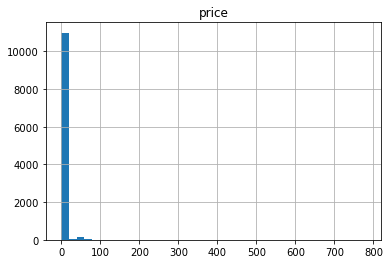

In [11]:
patterns_df.hist(column = 'price', bins = 40);

In [12]:
patterns_df[patterns_df['row_gauge'] > 60]
# should just ignore row_gauge, it's not often critical to a pattern - people are mostly concerned with stitch gauge

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
150,328678,138,2012/06/26,EUR,2.720169,1894.0,True,32821,False,24.00,4.0,garter stitch,Leftie,4.9,5477,5864,4.640108,1845.0,62.0,600.0,650.0,one (can be adapted to amount of yarn),True,Fingering (14 wpi),"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 2, 'permalink': 'female'}, {'id': 189,...",Knitting,True,Shawl/Wrap,Rohrspatz & Wollmeise Pure 100% Merino Superwash,Fingering
933,363243,41,2012/11/25,EUR,3.291585,511.0,True,6170,False,23.00,4.0,garter stitch,Strandwanderer,3.4,1604,1461,4.600000,515.0,62.0,503.0,610.0,one (adjustable),True,Fingering (14 wpi),"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 3, 'permalink': 'unisex'}, {'id': 63, ...",Knitting,True,Shawl/Wrap,Rohrspatz & Wollmeise Pure 100% Merino Superwash,Fingering
1798,930451,11,2019/05/22,USD,2.495468,331.0,True,8580,False,26.50,4.0,Measured over stitch pattern knit in the round...,Shiftalong,6.0,989,1101,4.874302,358.0,64.0,240.0,360.0,"Child (Adult Small, Adult Large)",True,Sport (12 wpi),"[{'id': 2, 'us': '2 ', 'metric': 2.75, 'us_ste...","{'crochet_gauge': None, 'id': 10, 'knit_gauge'...","[{'id': 413, 'name': 'Beanie, Toque', 'permali...","[{'id': 3, 'permalink': 'unisex'}, {'id': 7, '...",Knitting,True,Child,Spincycle Yarns Dyed in the Wool,Sport
4512,325642,33,2012/06/11,NaN,2.611940,134.0,True,3689,True,30.00,4.0,garter stitch,Longitudinal,NaN,452,989,4.364341,129.0,68.0,NaN,NaN,all,True,Fingering (14 wpi),"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 4, '...",Knitting,True,Socks,Schoppel-Wolle Zauberball®,Fingering
4744,353152,24,2012/10/14,EUR,2.788820,161.0,True,2355,False,23.00,4.0,garter stitch,Sonnentau,3.4,428,429,4.709877,162.0,62.0,503.0,656.0,one (adjustable),True,Fingering (14 wpi),"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 1, 'permalink': 'male'}, {'id': 2, 'pe...",Knitting,True,Shawl/Wrap,Rohrspatz & Wollmeise Sockenwolle 80/20 Twin,Fingering
6549,453630,63,2013/12/04,USD,3.106796,103.0,True,6959,True,32.00,4.0,garter stitch,Princess Franklin Plaid Collar,NaN,339,1518,4.419355,93.0,64.0,NaN,NaN,one,False,Sport (12 wpi),"[{'id': 2, 'us': '2 ', 'metric': 2.75, 'us_ste...","{'crochet_gauge': None, 'id': 10, 'knit_gauge'...","[{'id': 340, 'name': 'Cowl', 'permalink': 'cow...","[{'id': 3, 'permalink': 'unisex'}, {'id': 10, ...",Knitting,True,Shawl/Wrap,The Plucky Knitter Primo Sport,Sport
9717,335726,20,2012/07/29,USD,3.625000,88.0,True,4132,False,29.00,4.0,garter stitch (knit every row),Twig and Leaf,8.0,243,798,4.691489,94.0,64.0,525.0,875.0,petite/medium/tall,True,Lace,"[{'id': 4, 'us': '4 ', 'metric': 3.5, 'us_stee...","{'crochet_gauge': '', 'id': 7, 'knit_gauge': '...","[{'id': 339, 'name': 'Scarf', 'permalink': 'sc...","[{'id': 61, 'permalink': 'eyelets'}, {'id': 62...",Knitting,True,Scarf,Miss Babs Yet,Lace
11805,2272,1,2007/05/07,NaN,2.067308,104.0,False,209,False,32.00,4.0,garter stitch,Fingerless Garter Mitts,NaN,204,64,4.010526,95.0,64.0,170.0,NaN,"about 6"" (15cm) circumference relaxed and 7"" (...",False,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 

In [13]:
patterns_df[patterns_df['yardage'] > 10000]
# biggest outlier is a crochet blanket (in thread weight!), so most likely not an error
# to get meaningful yardage analysis should compare like to like, so break out categories (could compare knitting
# to crochet yardage)

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
28627,24704,26,2007/10/04,USD,6.615385,13.0,True,4120,True,NaN,NaN,NaN,Marguerite Bedspread #6132,NaN,91,556,4.272727,11.0,NaN,20000.0,25000.0,"65"" x 104"" or 86"" x 104""",False,Thread,"[{'id': 37, 'us': None, 'metric': 1.5, 'us_ste...","{'crochet_gauge': None, 'id': 9, 'knit_gauge':...","[{'id': 452, 'name': 'Bedspread', 'permalink':...","[{'id': 53, 'permalink': 'bobble-or-popcorn'},...",Crochet,False,Blanket,"'yarn_name': ""Aunt Lydia's Classic Crochet (Si...",Thread


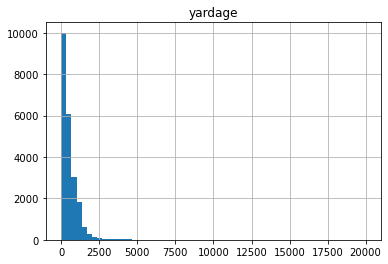

In [14]:
patterns_df.hist(column = 'yardage', bins = 60);
# definite bias towards lower-yardage projects - understandable, they get done more quickly

In [15]:
patterns_df[patterns_df['projects_count'] > 10000]

,patt_id,comments_count,created_at,currency,difficulty_average,difficulty_count,downloadable,favorites_count,free,gauge,gauge_divisor,gauge_pattern,patt_name,price,projects_count,queued_projects_count,rating_average,rating_count,row_gauge,yardage,yardage_max,sizes_available,ravelry_download,yarn_weight_description,pattern_needle_sizes,yarn_weight,pattern_categories,pattern_attributes,craft_name,clothing,type_name,patt_yarn,patt_yarn_weight
1,29,70,2007/01/12,NaN,2.647959,9283.0,True,23792,True,19.00,4.0,stockinette stitch,Clapotis,NaN,23435,8219,4.431221,8520.0,25.0,820.0,NaN,NaN,False,Aran (8 wpi),"[{'id': 8, 'us': '8 ', 'metric': 5.0, 'us_stee...","{'crochet_gauge': '', 'id': 1, 'knit_gauge': '...","[{'id': 350, 'name': 'Shawl / Wrap', 'permalin...","[{'id': 165, 'permalink': 'dropped-stitches'},...",Knitting,True,Shawl/Wrap,"'yarn_name': ""Lorna's Laces Lion & Lamb Multi",Aran
2,40,58,2007/02/06,NaN,2.939708,4445.0,True,13003,True,38.00,4.0,zigzag pattern,Jaywalker,NaN,12071,4112,4.266636,4373.0,NaN,465.0,NaN,NaN,True,Fingering (14 wpi),"[{'id': 1, 'us': '1 ', 'metric': 2.25, 'us_ste...","{'crochet_gauge': '', 'id': 5, 'knit_gauge': '...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 9, '...",Knitting,True,Socks,Zwerger Garn Opal Handpainted / Handgefärbt,Light Fingering
3,54,100,2007/02/07,USD,3.478894,3364.0,True,10444,False,9.00,4.0,"unfelted stockinette; 12 sts=4"" felted.",Felted Clogs (AC33e),7.95,13156,2447,4.527594,3171.0,NaN,500.0,850.0,NaN,True,Worsted (9 wpi),"[{'id': 13, 'us': '13 ', 'metric': 9.0, 'us_st...","{'crochet_gauge': None, 'id': 12, 'knit_gauge'...","[{'id': 363, 'name': 'Slippers', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 10, ...",Knitting,False,Other,'yarn_name': Non,'personal_name': '
5,88,77,2007/02/13,USD,1.815739,7294.0,True,28622,True,20.00,4.0,"2x2 Rib, lightly stretched",Calorimetry,NaN,19243,7936,4.223113,6611.0,22.0,93.0,NaN,NaN,False,Aran (8 wpi),"[{'id': 8, 'us': '8 ', 'metric': 5.0, 'us_stee...","{'crochet_gauge': '', 'id': 1, 'knit_gauge': '...","[{'id': 403, 'name': 'Headband', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 9, '...",Knitting,True,Hat,Filatura Di Crosa 127 Print,Aran
11,195,63,2007/03/10,USD,2.663896,8542.0,True,21044,True,21.00,4.0,stockinette stitch,Fetching,10.00,21216,5898,4.332523,7819.0,30.0,100.0,200.0,One size,True,Aran (8 wpi),"[{'id': 6, 'us': '6 ', 'metric': 4.0, 'us_stee...","{'crochet_gauge': '', 'id': 1, 'knit_gauge': '...","[{'id': 395, 'name': 'Fingerless Gloves/Mitts'...","[{'id': 2, 'permalink': 'female'}, {'id': 10, ...",Knitting,True,Mittens/Gloves,Debbie Bliss Cashmerino Aran,Aran
15,573,56,2007/04/03,USD,3.079484,8291.0,True,22216,True,32.00,4.0,stockinette stitch and lace pattern,Monkey Socks,6.00,22281,5946,4.558406,7953.0,48.0,388.0,NaN,"Leg circumference – 8 (8.5, 9)"", slightly stre...",True,Light Fingering,"[{'id': 21, 'us': '1½', 'metric': 2.5, 'us_ste...","{'crochet_gauge': None, 'id': 13, 'knit_gauge'...","[{'id': 885, 'name': 'Mid-calf', 'permalink': ...","[{'id': 2, 'permalink': 'female'}, {'id': 9, '...",Knitting,True,Socks,Shelridge Yarns Soft Touch Ultra Standard Hand...,Fingering
16,594,84,2007/04/05,USD,1.348003,4181.0,True,27451,True,20.00,4.0,pattern,One Row Handspun Scarf,NaN,11516,6270,4.631975,3853.0,NaN,NaN,NaN,NaN,False,Worsted (9 wpi),"[{'id': 8, 'us': '8 ', 'metric': 5.0, 'us_stee...","{'crochet_gauge': None, 'id': 12, 'knit_gauge'...","[{'id': 339, 'name': 'Scarf', 'permalink': 'sc...","[{'id': 3, 'permalink': 'unisex'}, {'id': 8, '...",Knitting,True,Scarf,Handspun,'personal_name': 'Handspun
17,605,99,2007/04/06,USD,3.420964,8357.0,False,25443,False,5.00,1.0,garter stitch,Baby Surprise Jacket,NaN,28692,5450,4.525768,7975.0,NaN,NaN,NaN,"one size, adjustable with gauge",False,DK (11 wpi),[],"{'crochet_gauge': None, 'id': 11, 'knit_gauge'...","[{'id': 304, 'name': 'Cardigan', 'permalink': ...","[{'id': 3, 'permalink': 'unisex'}, {'id': 4, '..."

In [16]:
# count of patterns by craft
patterns_craft = pd.DataFrame(patterns_df['craft_name'].value_counts().sort_values())
patterns_craft

,craft_name
Machine Knitting,8
Loom Knitting,13
Crochet,5542
Knitting,24635


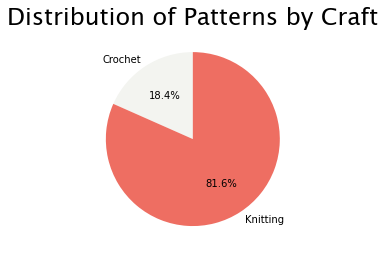

In [17]:
# count of patterns by craft

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Crochet', 'Knitting']
slices = [5542, 24635]
colors = ['#F3F4F0', '#EE6E62']

plt.pie(slices, labels = labels, colors = colors, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Patterns by Craft', fontname = 'Lucida Grande', fontsize = 24)

plt.savefig('../images/pattcount_craft.png');

In [18]:
# count of projects by craft
projects_craft = pd.DataFrame(patterns_df[['craft_name', 'projects_count']].groupby(['craft_name']).sum().sort_values(['projects_count']))
projects_craft

,projects_count
craft_name,
Machine Knitting,1652
Loom Knitting,1940
Crochet,1434540
Knitting,9587055


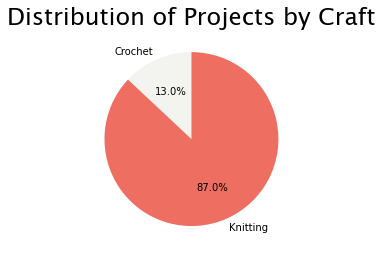

In [19]:
# count of projects by craft

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Crochet', 'Knitting']
slices = ['1434540', '9587055']
colors = ['#F3F4F0', '#EE6E62']

plt.pie(slices, labels = labels, colors = colors, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Projects by Craft', fontname = 'Lucida Grande', fontsize = 24)

plt.savefig('../images/projectcount_craft.png');

In [20]:
patterns_knitting_df = patterns_df[patterns_df['craft_name'] == 'Knitting']

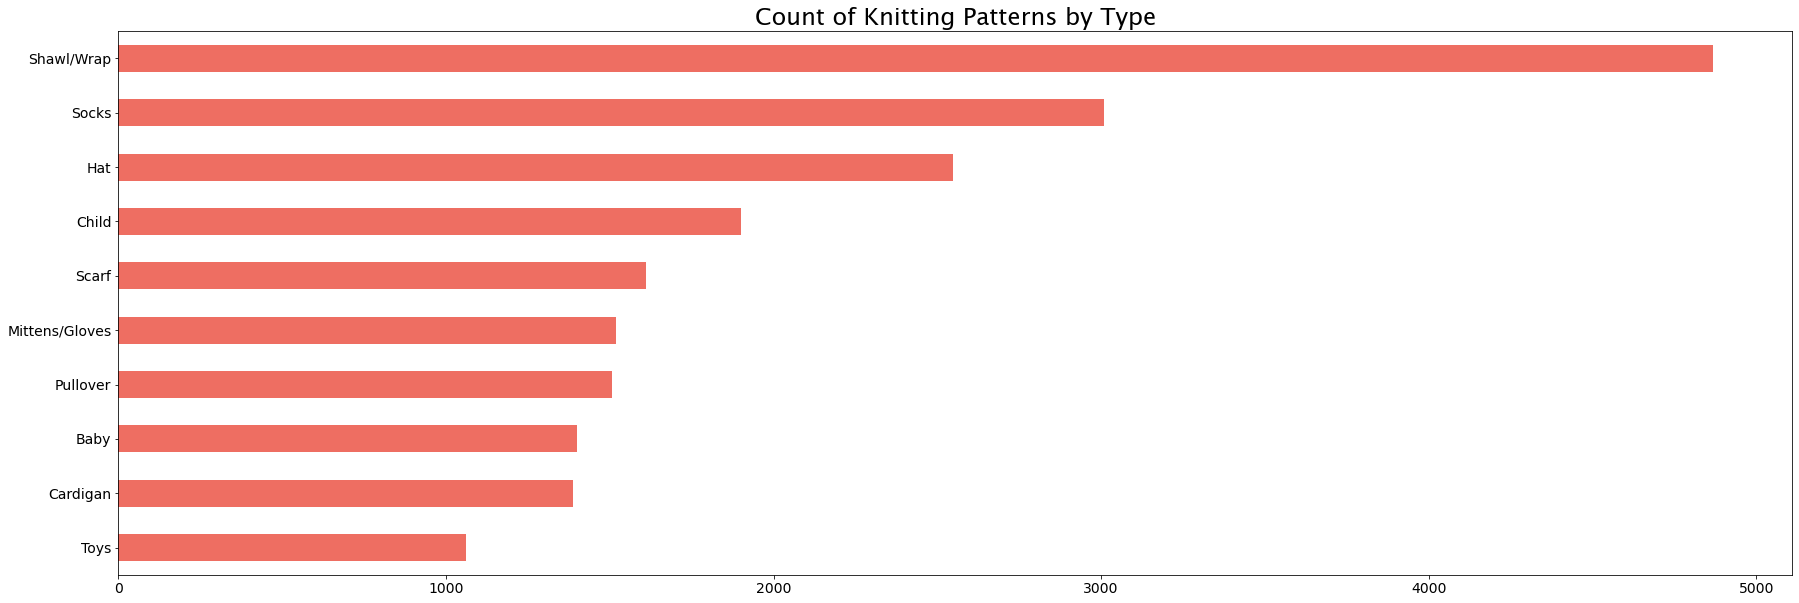

In [35]:
# count of patterns by type

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = patterns_knitting_df['type_name'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Knitting Patterns by Type', fontname = 'Lucida Grande', fontsize = 24)

# remove axis labels - feedback from Mary and Mahesh
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/pattcount_type.png', bbox_inches = 'tight');

In [22]:
project_type_df = patterns_knitting_df[['type_name', 'projects_count']].groupby(['type_name']).sum().sort_values(['projects_count']).nlargest(10, 'projects_count')
project_type_df.head()


,projects_count
type_name,
Shawl/Wrap,2065069
Socks,1253703
Hat,1029980
Child,867224
Scarf,680026


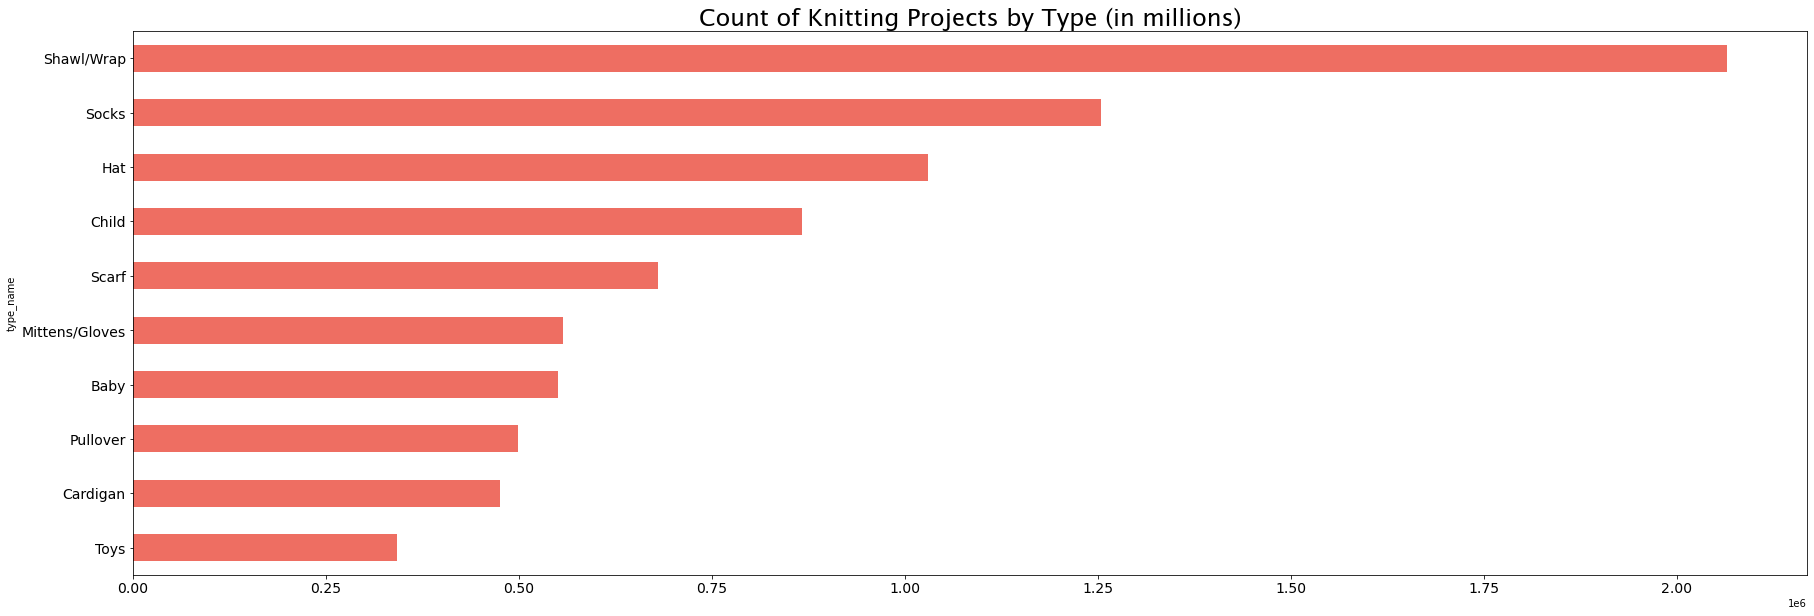

In [49]:
# count of knitting projects by pattern type

# sum # of projects and group by type_name, sort_values to put in descending order
plotdata = patterns_knitting_df[['type_name', 'projects_count']].groupby(['type_name']).sum().nlargest(10, 'projects_count').sort_values(['projects_count'])

# Plot a bar chart
plotdata.plot(kind = 'barh', figsize = (30, 10), color = '#EE6E62', fontsize = 14, legend = None)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Knitting Projects by Type (in millions)', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count (millions)', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/projectcount_type.png', bbox_inches = 'tight');

In [24]:
patterncount_yarn = patterns_df['yarn_weight_description'].value_counts()
patterncount_yarn.head()

Worsted (9 wpi)       6798
Fingering (14 wpi)    6657
DK (11 wpi)           4285
Aran (8 wpi)          3835
Sport (12 wpi)        2096
Name: yarn_weight_description, dtype: int64

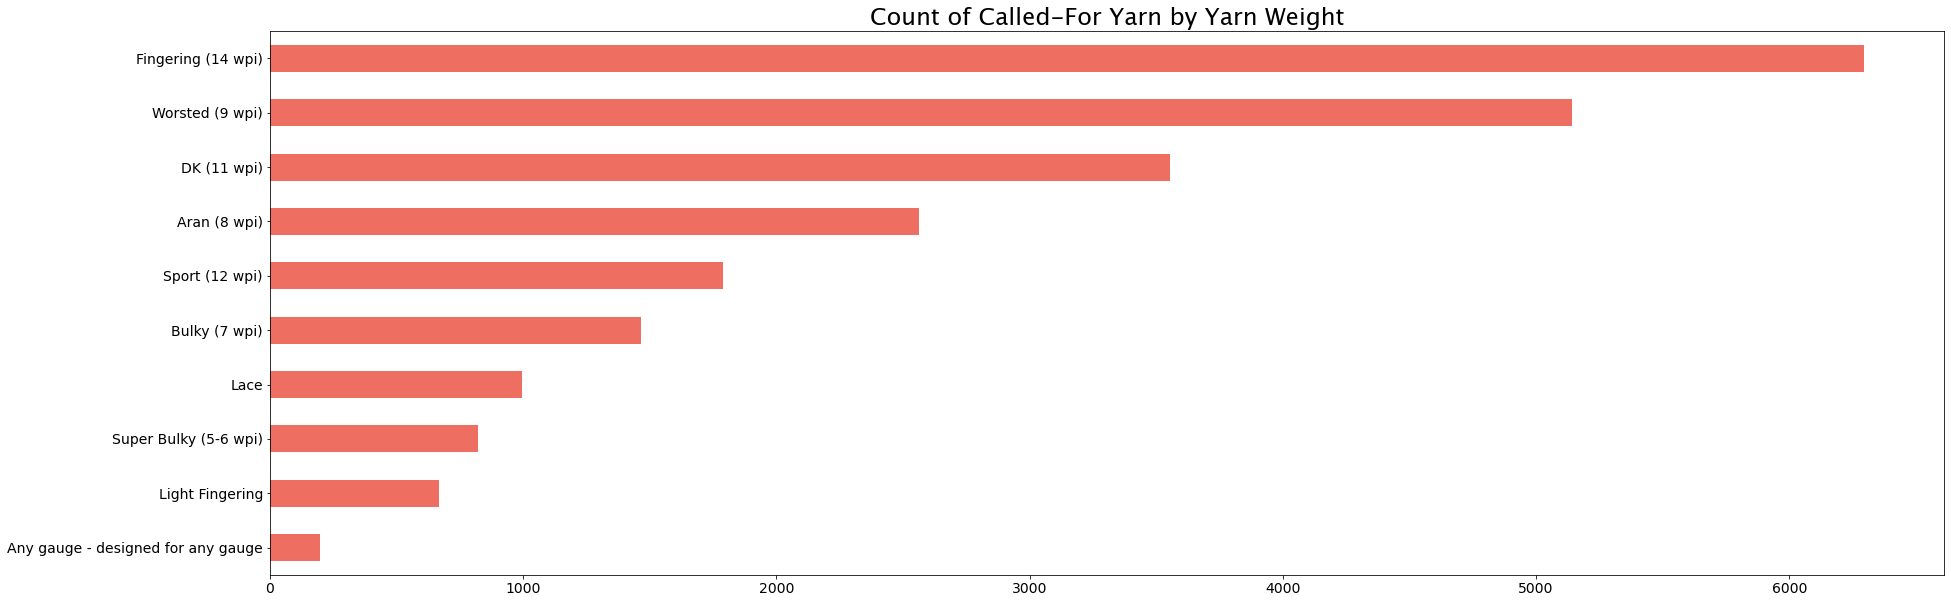

In [56]:
# count of called-for yarn

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = patterns_knitting_df['yarn_weight_description'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Called-For Yarn by Yarn Weight', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/yarncount_weight.png', bbox_inches = 'tight');

In [26]:
pattern_yarn_df = patterns_knitting_df[['yarn_weight_description', 'projects_count']].groupby(['yarn_weight_description']).sum().sort_values(['projects_count'])
pattern_yarn_df

,projects_count
yarn_weight_description,
Cobweb,3168
Jumbo (0-4 wpi),3824
Thread,6205
DK / Sport,18642
Aran / Worsted,47430
Any gauge - designed for any gauge,128328
Light Fingering,270199
Super Bulky (5-6 wpi),284463
Lace,352800


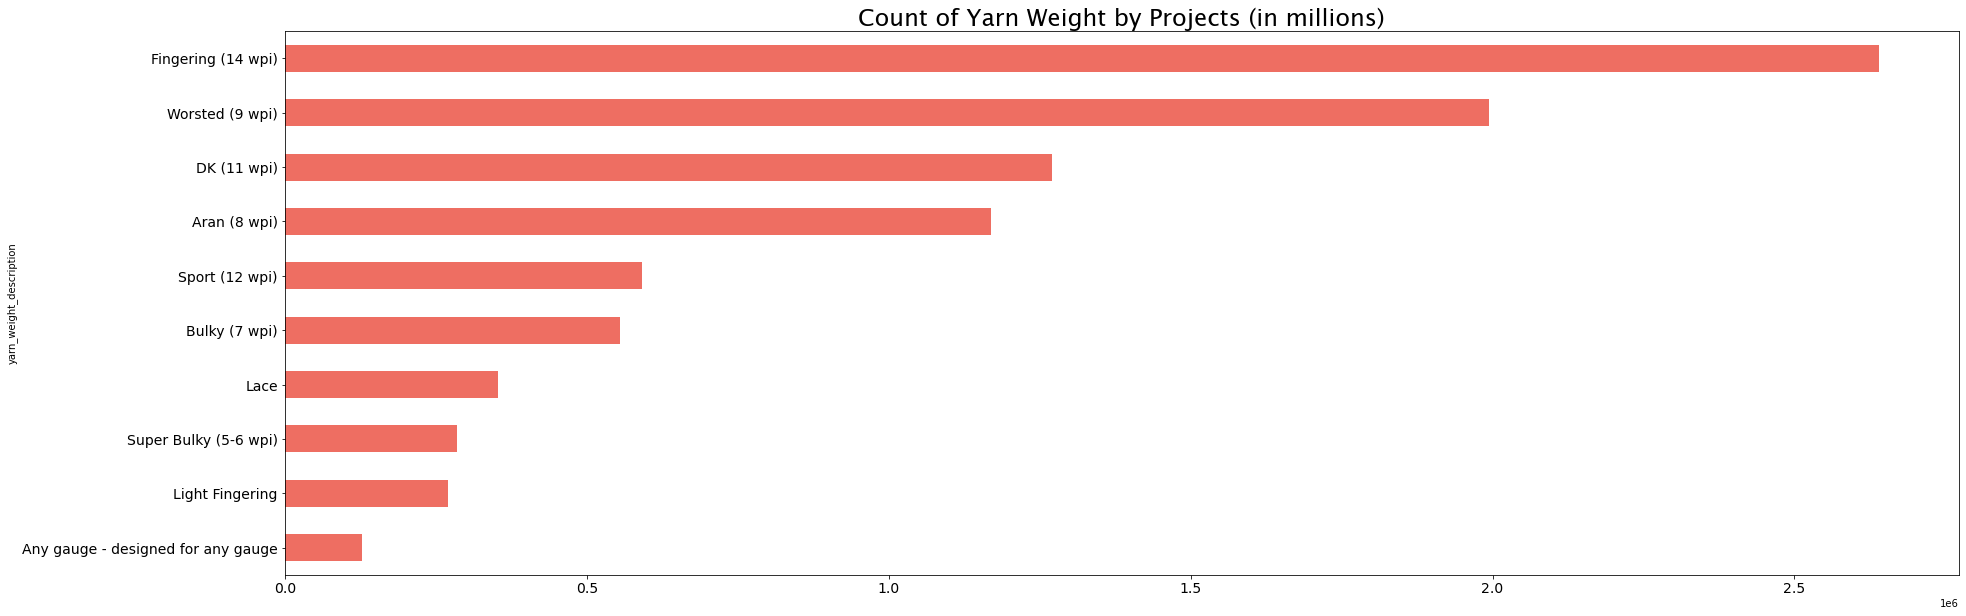

In [62]:
# count of yarn weight by projects

# group by , sort_values to put in descending order
plotdata = patterns_knitting_df[['yarn_weight_description', 'projects_count']].groupby(['yarn_weight_description']).sum().nlargest(10, 'projects_count').sort_values(['projects_count'])

# Plot a bar chart
plotdata.plot(kind = 'barh', figsize = (30, 10), color = '#EE6E62', fontsize = 14, legend = None)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Yarn Weight by Projects (in millions)', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count (million)', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/projectcount_weight.png', bbox_inches = 'tight');

In [28]:
calledfor_yarn_df = patterns_knitting_df[['type_name', 'yarn_weight_description']]
shawl_yarn_df = calledfor_yarn_df.loc[calledfor_yarn_df['type_name'] == 'Shawl/Wrap']
sock_yarn_df = calledfor_yarn_df.loc[calledfor_yarn_df['type_name'] == 'Socks']
hat_yarn_df = calledfor_yarn_df.loc[calledfor_yarn_df['type_name'] == 'Hat']
child_yarn_df = calledfor_yarn_df.loc[calledfor_yarn_df['type_name'] == 'Child']


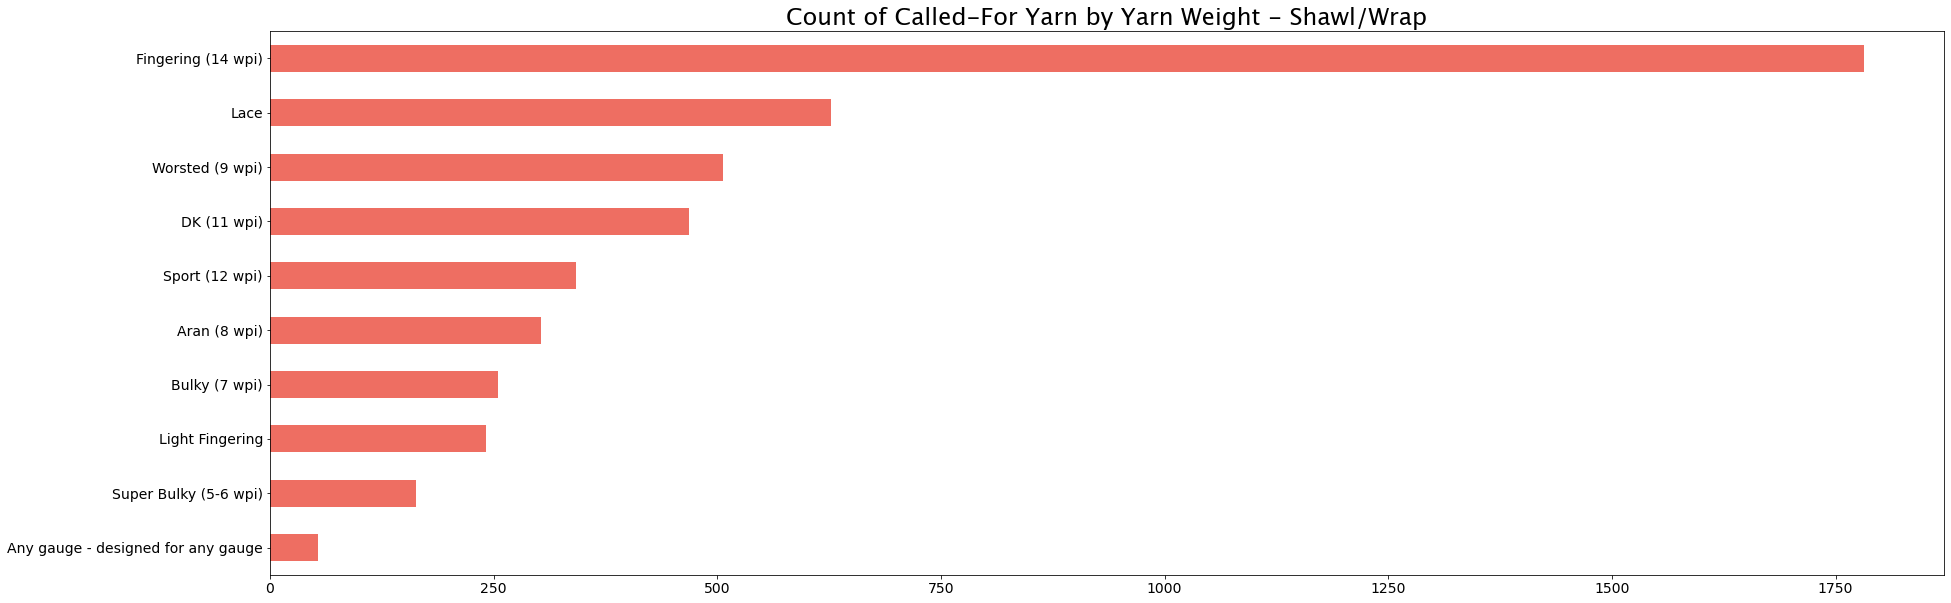

In [58]:
# count of called-for yarn for shawls

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = shawl_yarn_df['yarn_weight_description'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Called-For Yarn by Yarn Weight - Shawl/Wrap', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/shawlyarn_weight.png', bbox_inches = 'tight');

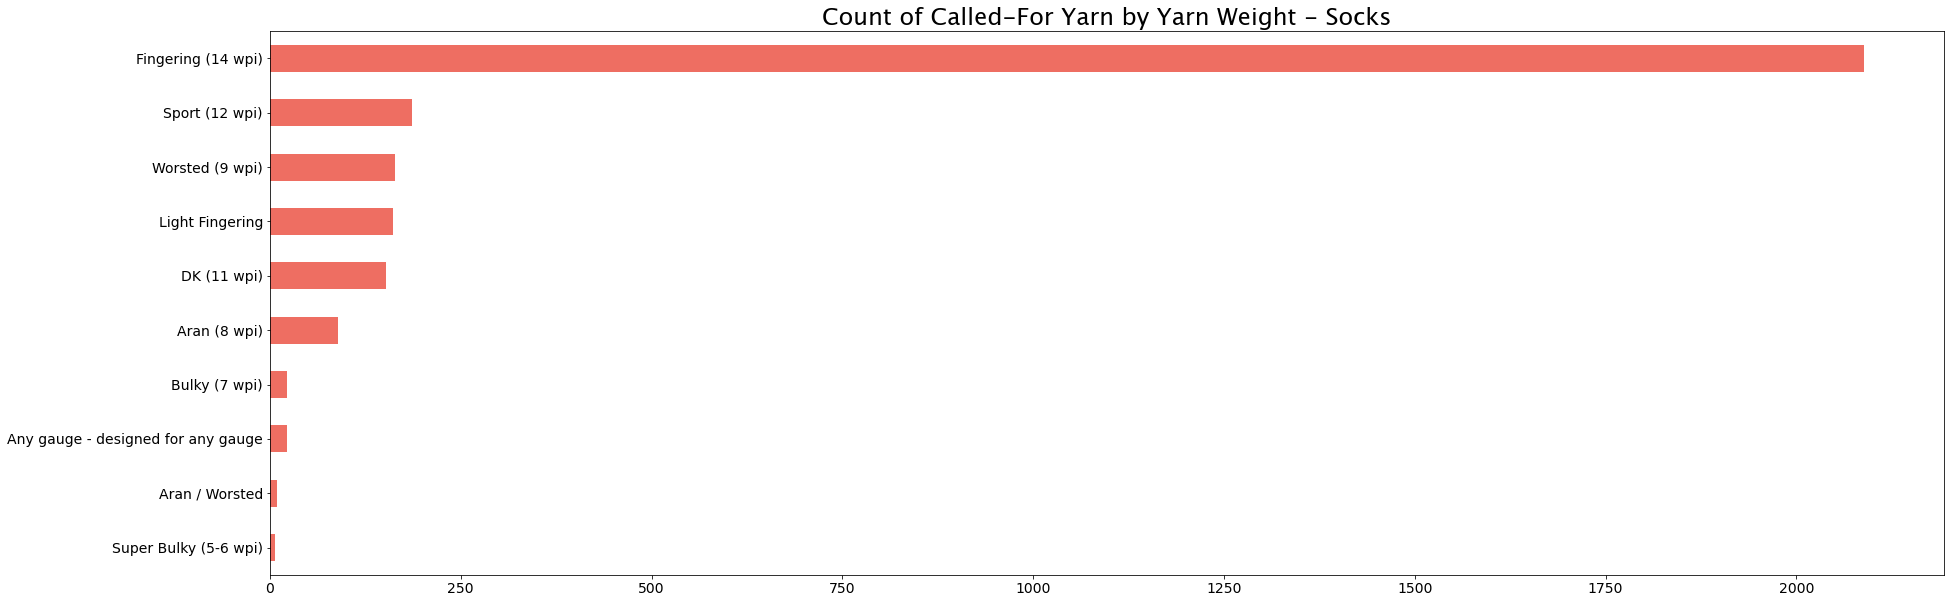

In [59]:
# count of called-for yarn for socks

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = sock_yarn_df['yarn_weight_description'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Called-For Yarn by Yarn Weight - Socks', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/sockyarn_weight.png', bbox_inches = 'tight');

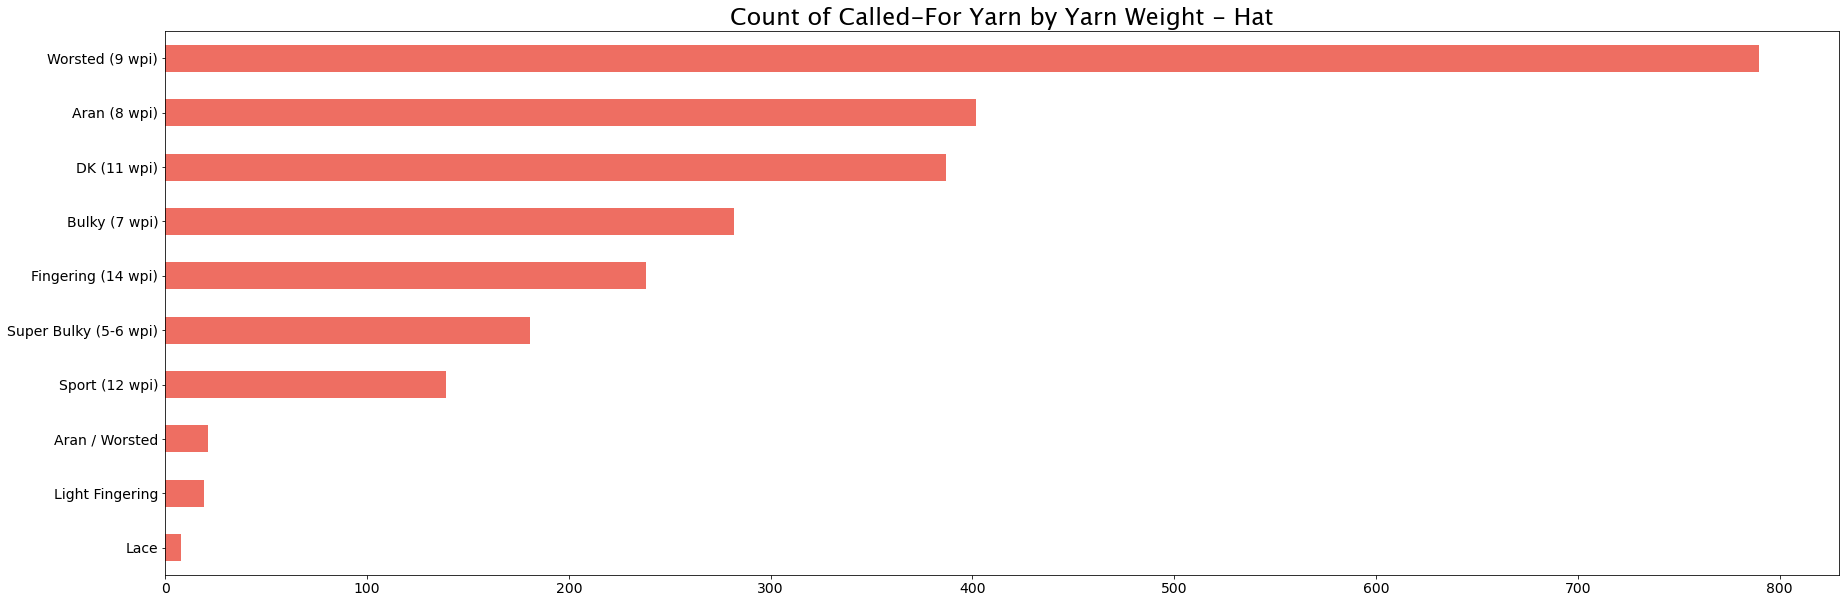

In [60]:
# count of called-for yarn for hats

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = hat_yarn_df['yarn_weight_description'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Called-For Yarn by Yarn Weight - Hat', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/hatyarn_weight.png', bbox_inches = 'tight');

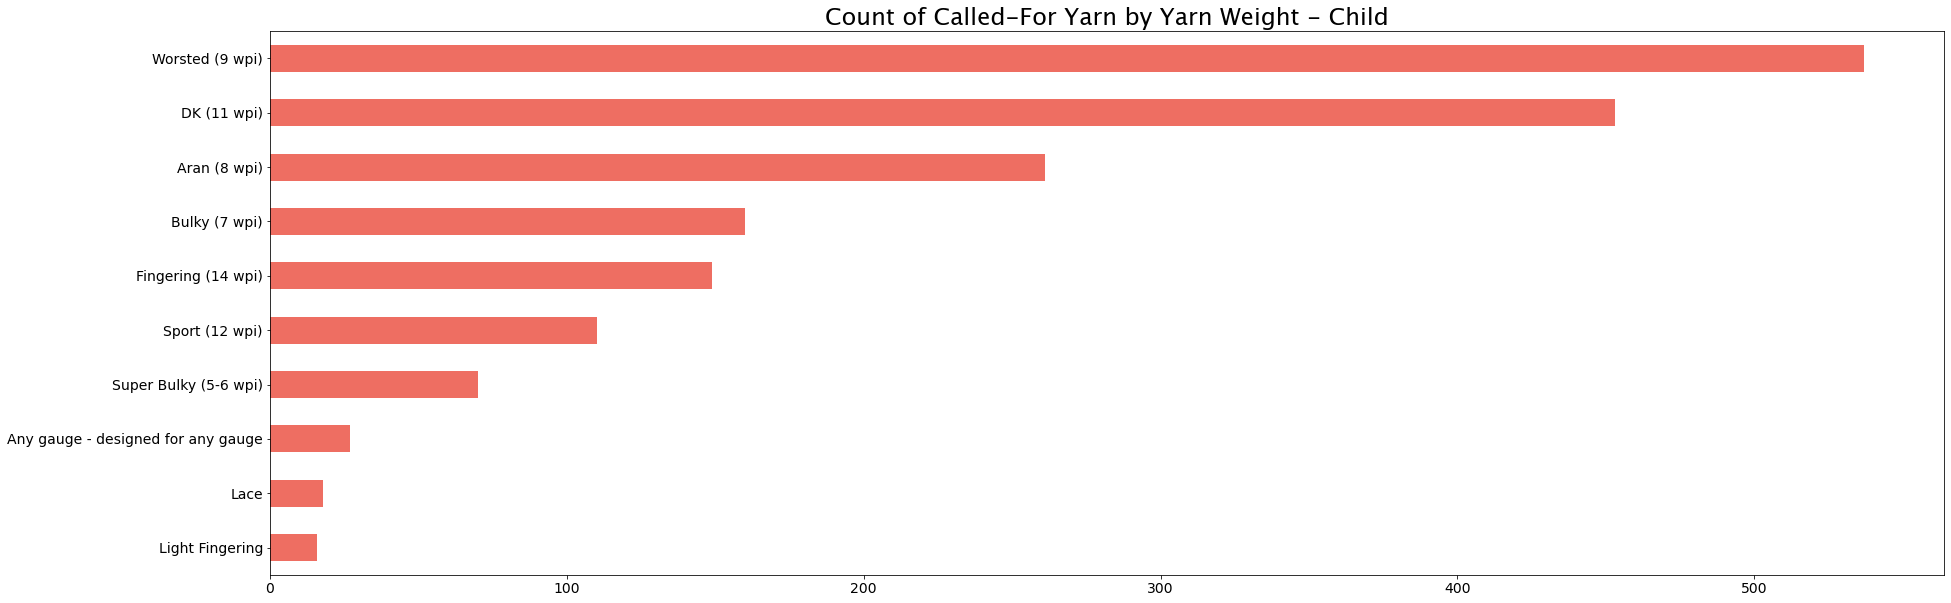

In [61]:
# count of called-for yarn for hats

plt.figure(figsize = (30, 10))

# value_counts to get frequency, sort_values to put in descending order
plotdata = child_yarn_df['yarn_weight_description'].value_counts().nlargest(10).sort_values()

# Plot a bar chart
plotdata.plot(kind = 'barh', color = '#EE6E62', fontsize = 14)

#plt.xticks(rotation = 80, horizontalalignment = 'center')
plt.title('Count of Called-For Yarn by Yarn Weight - Child', fontname = 'Lucida Grande', fontsize = 24)
#plt.xlabel('Count', fontname = 'Lucida Grande', fontsize = 16)
#plt.ylabel('Category', fontname = 'Lucida Grande', fontsize = 16)

plt.savefig('../images/childyarn_weight.png', bbox_inches = 'tight');